Missing or duplicate data may exist in a data set for a number of different reasons. Sometimes, missing or duplicate data is introduced as we perform cleaning and transformation tasks such as:
<ul>
    <li>Combining data</li>
    <li>Reindexing data</li>
    <li>Reshaping data</li>
    </ul>
    
Other times, it exists in the original data set for reasons such as:
<ul>
    <li>User input error</li>
    <li>Data storage or conversion issues</li>
    </ul>
    
In the case of missing values, they may also exist in the original data set to purposely indicate that data is unavailable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wh_2015 = pd.read_csv(r'C:\Users\lumum\Documents\Data Projects\working-with-missing-and-duplicate-data\datasets\wh_2015.csv')
wh_2016 = pd.read_csv(r'C:\Users\lumum\Documents\Data Projects\working-with-missing-and-duplicate-data\datasets\wh_2016.csv')
wh_2017 = pd.read_csv(r'C:\Users\lumum\Documents\Data Projects\working-with-missing-and-duplicate-data\datasets\wh_2017.csv')

In [2]:
shape_2015 = wh_2015.shape

In [3]:
shape_2015

(164, 13)

In [4]:
#use the series.isnull() method to identify rows with missing values.
missing = wh_2015['Happiness Score'].isnull()
#series.isnull() returns a boolean same sized object indicating if valeus are NA .NaN, gets mapped to True values
wh_2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [5]:
# when working with bigger data sets, it's easier to get a summary of the missing values as follows:
wh_2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

I will use the following work flow to clean our missing values, starting from checking for errors:

<ol type= "1">
    <li>Check for errors in data cleaning/transformation.</li>
    <li>Use data from additional sources to fill missing values.</li>
    <li>Drop row/column.</li>
    <li>Fill missing values with reasonable estimates computed from the available data.</li>
    </ol>

In [6]:
wh_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

In [7]:
wh_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [8]:
wh_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [9]:
#changing the column names
wh_2017.columns = wh_2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
#the r'[\(\)]' sets up a regex list of values to be replaced with ''.
wh_2015.columns = wh_2015.columns.str.replace(r'[\(\)]', '').str.upper()

wh_2016.columns = wh_2016.columns.str.replace(r'[\(\)]', '').str.upper()

combined = pd.concat([wh_2015, wh_2016, wh_2017], ignore_index=True)
missing = combined.isnull().sum()

C:\Users\lumum\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [10]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

We can learn more about where these missing values are located by visualizing them with a <b>heatmap</b>, a graphical representation of our data in which values are represented as colors. 
<br>We'll use the <b>seaborn library</b> to create the heatmap.</br>

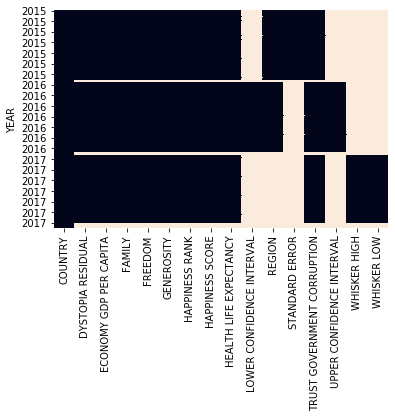

In [16]:
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

To understand this visualization, imagine we took combined, highlighted missing values in light gray and all other values in black, and then shrunk it so that was could easily view the entire dataframe at once.

We can make the following observations:
<ul>
<li>No values are missing in the COUNTRY column.</li>
<li>There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the COUNTRY column.</li>
    <li>Some columns only have data populated for one year.</li>
    <li>It looks like the REGION data is missing for the year 2017.</li>
    </ul>

In [20]:
combined[combined['YEAR']==2017]['REGION']

328    NaN
329    NaN
330    NaN
331    NaN
332    NaN
      ... 
487    NaN
488    NaN
489    NaN
490    NaN
491    NaN
Name: REGION, Length: 164, dtype: object